# Analyzing Lava Flow Velocity with Python 
##  OpenPIV CSV files to Xarray, Convert to Real World Units , and correct for Drone Motion
#### Jasper Baur

In [18]:
import pandas as pd
import xarray as xr
import numpy as np
import fsspec

import urllib
import urllib.request
from urllib.request import urlopen

import IPython ## 
from IPython import display
display.set_matplotlib_formats('retina')
from IPython.display import YouTubeVideo
import glob
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
%matplotlib inline  

!pip install fsspec==0.8.4
#!pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'

#!pip install 'git+git://github.com/tjcrone/gdrivefs.git@540a55fae06cbed4f7d9f8d540ac29fcb640c38a'
#import gdrivefs


## Loading Multiple files into one xarray and cleaning the data
Site 6: Flights 7, 8, 9, 10

#### Flight 7

In [2]:
#Local Drive Method!
files = glob.glob("/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F07/*.csv") #This is the directory witht the CSV files

F07 = []
i=0
for i in range(len(files)):
    dfi = pd.read_csv(files[i], sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F07.append(dfi)
    i=i+1

#Using gdrive implementation of fsspec to access data

#Google drive link for F07 0-20
#https://drive.google.com/drive/u/3/folders/1dRzyQe1T4phq_TKitCZs4m4UdfW2a5Ed
gdfid1 = '1dRzyQe1T4phq_TKitCZs4m4UdfW2a5Ed'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='browser')
files1 = gdfs1.ls('')

#Google drive link for F07 21-120
#https://drive.google.com/drive/u/3/folders/1pgNI8H-yI5kWkIrmeTF0rvw4g8Fo3zOq
gdfid2 = '1pgNI8H-yI5kWkIrmeTF0rvw4g8Fo3zOq'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files07 = files1 + files2

#Takes multiple CSV files and reads them all into one xarray as a List
files1 = glob.glob("/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_5_PIV/F07/*.csv") #This is the directory witht the CSV files

F07 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F07.append(dfi)
    
    
    

    
#i=0
#for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F07.append(dfi)

In [3]:
#Convert it to dataArray and merge coordiantes along time dimension
df07 = xr.concat(F07, dim = 'time')
df07 =df07.sortby('time', ascending=True)
df07['time'] =np.arange(0,120)
df07

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Data variables:
    u        (time, x, y) float64 0.3826 0.4679 0.5215 ... -0.0463 -0.0829
    v        (time, x, y) float64 -2.979 -3.021 -3.082 ... -0.9042 -0.8046
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### Flight 8

In [4]:
files = glob.glob("/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F08/*.csv") #This is the directory witht the CSV files

F08 = []
i=0
for i in range(len(files)):
    dfi = pd.read_csv(files[i], sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F08.append(dfi)
    i=i+1


In [ ]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F08 0-20
#https://drive.google.com/drive/u/3/folders/1TF0KZIQaSnXhf38jxtKGdZSZ9NF-9WIE
gdfid1 = '1TF0KZIQaSnXhf38jxtKGdZSZ9NF-9WIE'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='cache')
files1 = gdfs1.ls('')

#Google drive link for F08 21-120
#https://drive.google.com/drive/u/3/folders/1q9EgvnGwpZvJFGbBe6yuM1afLoh1n633
gdfid2 = '1q9EgvnGwpZvJFGbBe6yuM1afLoh1n633'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files08 = files1 + files2

In [ ]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files1 + files2 : these are the directory with the CSV files

F08 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F08.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F08.append(dfi)

In [5]:
#Convert it to dataArray and merge coordiantes along time dimension
df08 = xr.concat(F08, dim = 'time')
df08 =df08.sortby('time', ascending=True)
df08['time'] =np.arange(0,120)
df08

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Data variables:
    u        (time, x, y) float64 -2.119 -2.052 -2.008 ... 0.3661 0.3512 0.1482
    v        (time, x, y) float64 -3.996 -3.914 -3.957 ... 0.3498 0.3509 0.2115
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### Flight 9

In [6]:
files = glob.glob("/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F09/*.csv") #This is the directory witht the CSV files

F09 = []
i=0
for i in range(len(files)):
    dfi = pd.read_csv(files[i], sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F09.append(dfi)
    i=i+1



In [ ]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F09 0-20
#https://drive.google.com/drive/u/3/folders/1B0trTgJ1KlnV24w8PRBixb6GbE7cBI_s
gdfid1 = '1B0trTgJ1KlnV24w8PRBixb6GbE7cBI_s'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='cache')
files1 = gdfs1.ls('')

#Google drive link for F09 21-120
#https://drive.google.com/drive/u/3/folders/1veNpNBtfcMws9455MkvQyhip4n_Wdn6B
gdfid2 = '1veNpNBtfcMws9455MkvQyhip4n_Wdn6B'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files08 = files1 + files2

In [ ]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files1 + files2 : these are the directory with the CSV files

F09 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F09.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F09.append(dfi)

In [7]:
#Convert it to dataArray and merge coordiantes along time dimension
df09 = xr.concat(F09, dim = 'time')
df09 =df09.sortby('time', ascending=True)
df09['time'] =np.arange(0,120)
df09

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Data variables:
    u        (time, x, y) float64 1.824 1.701 1.968 ... 0.8069 1.008 0.9958
    v        (time, x, y) float64 0.777 0.8736 0.7732 ... -1.282 -1.316 -1.443
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

#### Flight 10

In [8]:
files = glob.glob("/Users/Jasper/Volc_Research/Workflow_OPENPIV/2_Site_4_PIV/F10/*.csv") #This is the directory witht the CSV files

F10 = []
i=0
for i in range(len(files)):
    dfi = pd.read_csv(files[i], sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F10.append(dfi)
    i=i+1



In [ ]:
#Using gdrive implementation of fsspec to access data

#Google drive link for F10 0-20
#https://drive.google.com/drive/u/3/folders/10AKN5mi2jbbhTd5vgthX3TWjRBDDuBs6
gdfid1 = '10AKN5mi2jbbhTd5vgthX3TWjRBDDuBs6'
gdfs1 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid1, token ='cache')
files1 = gdfs1.ls('')

#Google drive link for F07 21-120
#https://drive.google.com/drive/u/3/folders/1BB-QnJI0FEdswQT9z6X8tYPjSgzx9Q94
gdfid2 = '1BB-QnJI0FEdswQT9z6X8tYPjSgzx9Q94'
gdfs2 = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfid2, token ='cache')
files2 = gdfs2.ls('')

files08 = files1 + files2

In [ ]:
#Takes multiple CSV files and reads them all into one xarray as a List

# files1 + files2 : these are the directory with the CSV files

F10 = []
i=0
for i in range(len(files1)):
    dfi = pd.read_csv(gdfs1.open(files1[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file1 = files1[i]
    sec = file1[len(file1)-6: len(file1)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F10.append(dfi)
    
i=0
for i in range(len(files2)):
    dfi = pd.read_csv(gdfs2.open(files2[i]), sep = '\t', header=None,index_col=(0,1) )
    dfi.columns = ('u', 'v', 'mask')
    dfi.index.rename(['x','y'], inplace=True)
    dfi = dfi[~dfi.index.duplicated()]
    dfi =dfi.to_xarray()
    file2 = files2[i]
    sec = file1[len(file2)-6: len(file2)-4] # may need to be adjusted depending on file name length
    dfi['time']=sec
    F10.append(dfi)

In [9]:
#Convert it to dataArray and merge coordiantes along time dimension
df10 = xr.concat(F10, dim = 'time')
df10 =df10.sortby('time', ascending=True)
df10['time'] =np.arange(0,120)
df10

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Data variables:
    u        (time, x, y) float64 -0.2521 -0.287 -0.3775 ... -0.5201 -0.5707
    v        (time, x, y) float64 1.043 0.8029 0.7745 ... 0.1839 0.1432 -0.1152
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

### Combine all Flights into one Dataset with new dimension (Flight)

In [10]:
Flights = [df07, df08, df09, df10]
dfx = xr.concat(Flights, dim = 'Flight')
dfx =dfx.sortby('Flight', ascending=True)
dfx = dfx.assign_coords(Flight =['F07','F08','F09', 'F10'])
dfx['time'] =np.arange(0,120)
dfx

<xarray.Dataset>
Dimensions:  (Flight: 4, time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 32.0 64.0 96.0 128.0 ... 3.744e+03 3.776e+03 3.808e+03
  * y        (y) float64 32.0 64.0 96.0 128.0 ... 2.048e+03 2.08e+03 2.112e+03
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * Flight   (Flight) <U3 'F07' 'F08' 'F09' 'F10'
Data variables:
    u        (Flight, time, x, y) float64 0.3826 0.4679 ... -0.5201 -0.5707
    v        (Flight, time, x, y) float64 -2.979 -3.021 ... 0.1432 -0.1152
    mask     (Flight, time, x, y) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

### Make Conversions to real world units

In [11]:
#Sensor and Drone Measurments ----
AGL = 304.8 #meters  
FOV = np.deg2rad(78.8) #degrees
Aspect =  2160/3840   #aspect ratio 16:9 

D =   2 * AGL *np.tan(FOV/2) #diagnol of image

A = (D) / np.sqrt(1 + Aspect**2)
B = Aspect * D / np.sqrt(1 + Aspect**2)
print('Image Footprint:',A, 'm x', B, 'm')

PixelX = 3840 #width of image in pixels
PixelY = 2180 #height of image in pixels


GSDx = A/ PixelX
GSDy = B/ PixelY

print('Ground Sampling Distance:', 'x:', GSDx, 'y:', GSDy)

Image Footprint: 436.4249645610448 m x 245.4890425655877 m
Ground Sampling Distance: x: 0.11365233452110542 y: 0.11260965255302188


In [12]:
#Velocity Calculation

dfx['u'] = dfx.u *GSDx 
dfx['v'] = dfx.v*-1 * GSDy # the negative is to make the downstream velocity positive

#Spatial Calculation
dfx['x'] = dfx.x*GSDx 
dfx['y'] = dfx.y*GSDy 

## Subtract out drone motion from velocity fields

#### Subtract out v velocity of still region from image

In [27]:
#Each flight
F07 = dfx.sel(Flight= 'F07')
F08 = dfx.sel(Flight= 'F08')
F09 = dfx.sel(Flight= 'F09')
F10 = dfx.sel(Flight= 'F10')

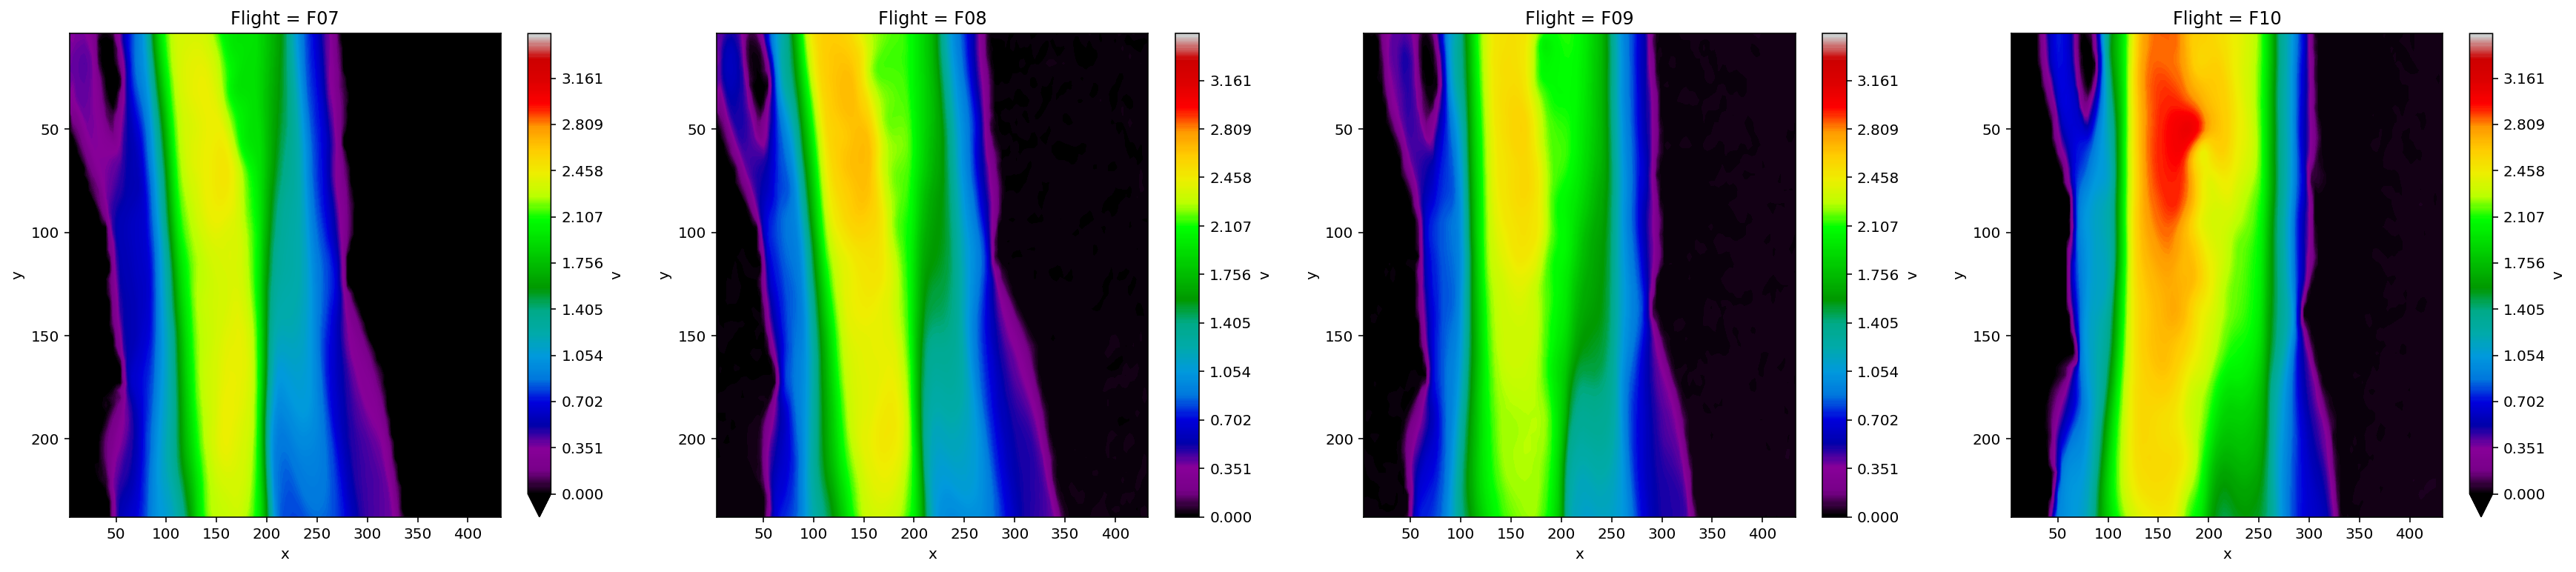

In [28]:
fig, axes = plt.subplots(figsize=(30, 6), ncols=4, )

F07.v.mean(dim='time').transpose().plot.contourf(ax=axes[0], levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, yincrease=False)
F08.v.mean(dim='time').transpose().plot.contourf(ax=axes[1], levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, yincrease=False)
F09.v.mean(dim='time').transpose().plot.contourf(ax=axes[2], levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, yincrease=False)
F10.v.mean(dim='time').transpose().plot.contourf(ax=axes[3],levels=300, vmin=0, vmax=3.5, cmap=cm.nipy_spectral, yincrease=False)


In [31]:
F07

<xarray.Dataset>
Dimensions:  (time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 3.637 7.274 10.91 14.55 ... 421.9 425.5 429.2 432.8
  * y        (y) float64 3.604 7.207 10.81 14.41 ... 227.0 230.6 234.2 237.8
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
    Flight   <U3 'F07'
Data variables:
    u        (time, x, y) float64 0.04348 0.05318 ... -0.005262 -0.009422
    v        (time, x, y) float64 0.3355 0.3402 0.347 ... 0.1089 0.1018 0.09061
    mask     (time, x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [37]:
#dfx.sel(Flight= 'F07', x=slice(100,200), y=slice(100, 237)).v.mean(dim= ('x', 'y', 'time'))

<xarray.DataArray 'v' ()>
array(2.08280025)
Coordinates:
    Flight   <U3 'F07'

In [38]:
#total error of still region v before correction
np.sum(np.sqrt(F07.sel(x=slice(0,70), y=slice(0, 237)).v**2))

<xarray.DataArray 'v' ()>
array(37243.45071385)
Coordinates:
    Flight   <U3 'F07'

In [39]:
#total error of still region u before correction
np.sum(np.sqrt(F07.sel(x=slice(0,70), y=slice(100, 237)).u**2))

<xarray.DataArray 'u' ()>
array(8201.3531236)
Coordinates:
    Flight   <U3 'F07'

#### F07

In [40]:
###########################################################################################
for i in range(120):
    Av = dfx.sel(Flight= 'F07',time= i, x=slice(350,432), y=slice(0, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F07', time= i, x=slice(0,25), y=slice(100, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F07').v[i] = dfx.sel(Flight='F07').v[i] - Cv

In [41]:
#total error of still region v after correction
np.sum(np.sqrt(dfx.sel(Flight='F07',x=slice(380,420), y=slice(50, 237)).v**2))

<xarray.DataArray 'v' ()>
array(2337.85398114)
Coordinates:
    Flight   <U3 'F07'

In [42]:

for i in range(120):
    Au = dfx.sel(Flight= 'F07',time= i, x=slice(350,432), y=slice(0, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F07', time= i, x=slice(0,25), y=slice(100, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F07').u[i] = dfx.sel(Flight='F07').u[i] - Cu

In [43]:
#total error of still region u after correction
np.sum(np.sqrt(F07.sel(x=slice(380,420), y=slice(50, 237)).u**2))

<xarray.DataArray 'u' ()>
array(1559.35751314)
Coordinates:
    Flight   <U3 'F07'

#### F08

In [44]:
for i in range(120):
    Av = dfx.sel(Flight= 'F08',time= i, x=slice(350,432), y=slice(0, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F08', time= i, x=slice(0,25), y=slice(100, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F08').v[i] = dfx.sel(Flight='F08').v[i] - Cv

In [45]:
for i in range(120):
    Au = dfx.sel(Flight= 'F08',time= i, x=slice(350,432), y=slice(0, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F08', time= i, x=slice(0,25), y=slice(100, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F08').u[i] = dfx.sel(Flight='F08').u[i] - Cu

#### F09

In [46]:
for i in range(120):
    Av = dfx.sel(Flight= 'F09',time= i, x=slice(350,432), y=slice(0, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F09', time= i, x=slice(0,25), y=slice(100, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F09').v[i] = dfx.sel(Flight='F09').v[i] - Cv

In [47]:
for i in range(120):
    Au = dfx.sel(Flight= 'F09',time= i, x=slice(350,432), y=slice(0, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F09', time= i, x=slice(0,25), y=slice(100, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F09').u[i] = dfx.sel(Flight='F09').u[i] - Cu

#### F10

In [48]:
for i in range(120):
    Av = dfx.sel(Flight= 'F10',time= i, x=slice(350,432), y=slice(0, 237)).v.mean(dim= ('x', 'y'))
    Bv = dfx.sel(Flight= 'F10', time= i, x=slice(0,25), y=slice(100, 237)).v.mean(dim= ('x', 'y'))
    Cv = (Av+Bv)/ 2
    dfx.sel(Flight='F10').v[i] = dfx.sel(Flight='F10').v[i] - Cv

In [49]:
for i in range(120):
    Au = dfx.sel(Flight= 'F10',time= i, x=slice(350,432), y=slice(0, 237)).u.mean(dim= ('x', 'y'))
    Bu = dfx.sel(Flight= 'F10', time= i, x=slice(0,25), y=slice(100, 237)).u.mean(dim= ('x', 'y'))
    Cu = (Au+Bu)/ 2
    dfx.sel(Flight='F10').u[i] = dfx.sel(Flight='F10').u[i] - Cu

## Additional Data Processing

### Add Total Velocity (s) to dataArray

In [50]:
s = np.sqrt(dfx.u**2+dfx.v**2)
dfx['s']= s
dfx

<xarray.Dataset>
Dimensions:  (Flight: 4, time: 120, x: 119, y: 66)
Coordinates:
  * x        (x) float64 3.637 7.274 10.91 14.55 ... 421.9 425.5 429.2 432.8
  * y        (y) float64 3.604 7.207 10.81 14.41 ... 227.0 230.6 234.2 237.8
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
  * Flight   (Flight) <U3 'F07' 'F08' 'F09' 'F10'
Data variables:
    u        (Flight, time, x, y) float64 0.05169 0.06138 ... 0.03728 0.03153
    v        (Flight, time, x, y) float64 0.3545 0.3593 ... -0.01625 0.01285
    mask     (Flight, time, x, y) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    s        (Flight, time, x, y) float64 0.3583 0.3645 ... 0.04067 0.03405

In [55]:
dfx.u.quantile([.99,1.00])

<xarray.DataArray 'u' (quantile: 2)>
array([0.4484614 , 0.77807099])
Coordinates:
  * quantile  (quantile) float64 0.99 1.0

### Correct for Spikes

In [56]:
dfx = dfx.where(dfx.v<5 )
dfx = dfx.where(dfx.u<3 , dfx.u > -3)
dfx = dfx.where(dfx.s<5 )

### Drop Mask (no information)

In [57]:
dfx = dfx.drop('mask')

## Save the Xarray with all the velocity fields

In [58]:
dfx.to_netcdf('0726_Site4_Velocity_Fields.nc') # Saves on your local disk 

## Load in the Xarray you Created

In [ ]:
#Pull from Google Drive folder (example below) by adding your own unique ID or just load Xarray from you local drive

gdfidXR = '1Hly2lA3gg9HvbmMxH7wt4aTDTY-BzFg0' 
gdfsXR = gdrivefs.GoogleDriveFileSystem(root_file_id=gdfidXR, token ='cache')
filesXr = gdfsXR.ls('')

dfx = xr.open_dataset(gdfsXR.open(filesXr[0]))  

### Select By Flights

In [ ]:
F07 = dfx.sel(Flight= 'F07')
F08 = dfx.sel(Flight= 'F08')
F09 = dfx.sel(Flight= 'F09')
F10 = dfx.sel(Flight= 'F10')

### Metadata 
#### Site 6 Location
Latitude: 19.476251  
Longitude: -154.899143


#### Date 07/26/2018 
Start and end times HST

Flight 07: 12:53	13:08

Flight 08: 13:19	13:35

Flight 09: 13:48	14:05

Flight 10: 14:25	14:40

- Flights trimed to 2:00 min in pre-processing

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm

F08.v.mean(dim='time').transpose().plot.contourf(levels=300, vmin=0, vmax=3, cmap=cm.nipy_spectral, yincrease=False)